In [ ]:
!pip install rdkit
!pip install scikit
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

def CalculateYuleAndCosine(fpA, fpB):

    yule = DataStructs.DiceSimilarity(fpA, fpB)
    cosine = DataStructs.CosineSimilarity(fpA, fpB)

    return yule, cosine

def CalculateTversky(fp1_3d, fp2_3d, alpha = 1.0, beta = 1.5):

    intersection = DataStructs.TanimotoSimilarity(fp1_3d, fp2_3d)
    a = alpha * (fp1_3d.GetNumOnBits() - intersection)
    b = beta * (fp2_3d.GetNumOnBits() - intersection)

    tversky = intersection / (a + b - intersection)

    return tversky

def CalculateThreeDimTanimoto(fp1_3d, fp2_3d):

    sim = DataStructs.TanimotoSimilarity(fp1_3d, fp2_3d)
    return sim

def kmeans(matrix, min_k = 5, max_k = 20):

    inertias = []

    for i in range(min_k, max_k+1):

        kmean = KMeans(n_clusters = i, random_state = 42)
        kmean.fit(matrix)
        inertias.append(kmean.inertia_)

    return inertias

In [4]:
#df = pd.read_csv("/home/gudurkc2104/Desktop/ML Proj/modified_dset.csv")
df = pd.read_pickle("/content/final_dset.pkl")

X = df[['smiles', 'Molecule', 'FingerPrint', 'FingerPrint_3d']]
Y = df['mpC']



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

no_mol = len(X_train)
print(no_mol)

2432


In [5]:
yule_matrix = np.zeros((no_mol, no_mol))
cosine_matrix = np.zeros((no_mol, no_mol))
tanimoto_matrix = np.zeros((no_mol, no_mol))
threed_matrix = np.zeros((no_mol, no_mol))

n = 0
if( no_mol%2 == 0):
    n = int(no_mol/2)
else:
    n = int(no_mol/2) + 1

#X_train['Molecule'] = X_train['Molecule'].apply(ast.literal_eval)
#fpA = X_train['FingerPrint'].apply(ast.literal_eval)
#df['Molecule'] = df['Molecule'].apply(lambda x: Chem.MolFromPickle(x) if x else None)
#df['Fingerprint'] = df['Fingerprint'].apply(lambda x: DataStructs.CreateFromBitString(x.ToBitString()) if x else None)

for i in range(n):
    #print(i, '\n\n')
    molA = X_train['Molecule'].iloc[i]
    fpA = X_train['FingerPrint'].iloc[i]
    fpA_3d = X_train['FingerPrint_3d'].iloc[i]
    if(molA is None):
        continue
    for j in range(no_mol):
        #print(j)
        if(i == j):
            continue
        else:
            molB = X_train['Molecule'].iloc[j]
            fpB = X_train['FingerPrint'].iloc[j]
            fpB_3d = X_train['FingerPrint_3d'].iloc[j]
            if(molB is None):
                continue

            yule_matrix[i][j], cosine_matrix[i][j] = CalculateYuleAndCosine(fpA, fpB)
            yule_matrix[i][j] = 1 - yule_matrix[i][j]
            cosine_matrix[i][j] = 1 - cosine_matrix[i][j]
            yule_matrix[j][i] = yule_matrix[i][j]
            cosine_matrix[j][i] = cosine_matrix[i][j]

            tanimoto_matrix[i][j] = 1 - DataStructs.TanimotoSimilarity(fpA, fpB)
            tanimoto_matrix[j][i] = tanimoto_matrix[i][j]

            threed_matrix[i][j] = 1 - CalculateThreeDimTanimoto(fpA_3d, fpB_3d)
            threed_matrix[j][i] = threed_matrix[i][j]

print(yule_matrix)
print(cosine_matrix)
print(tanimoto_matrix)
print(threed_matrix)

[[0.         0.92092257 0.8612368  ... 0.69712794 0.91864407 0.43814844]
 [0.92092257 0.         0.77419355 ... 0.8773842  0.86285714 0.91885442]
 [0.8612368  0.77419355 0.         ... 0.78227848 0.92207792 0.88143177]
 ...
 [0.69712794 0.8773842  0.78227848 ... 0.         0.         0.        ]
 [0.91864407 0.86285714 0.92207792 ... 0.         0.         0.        ]
 [0.43814844 0.91885442 0.88143177 ... 0.         0.         0.        ]]
[[0.         0.89164095 0.83494618 ... 0.6952607  0.8805497  0.42834993]
 [0.89164095 0.         0.76820684 ... 0.81816957 0.86220544 0.87260824]
 [0.83494618 0.76820684 0.         ... 0.72383647 0.91786899 0.8421836 ]
 ...
 [0.6952607  0.81816957 0.72383647 ... 0.         0.         0.        ]
 [0.8805497  0.86220544 0.91786899 ... 0.         0.         0.        ]
 [0.42834993 0.87260824 0.8421836  ... 0.         0.         0.        ]]
[[0.         0.95883362 0.92544571 ... 0.82153846 0.95759717 0.60932297]
 [0.95883362 0.         0.87272727 ... 

In [6]:
#yule_matrix_2d = []
#for i in range(no_mol):
#    yule_matrix_2d.append([])
#    for j in range(no_mol):
#        yule_matrix_2d[i].append(yule_matrix[i][j])

#cosine_matrix_2d = []
#for i in range(no_mol):
#    cosine_matrix_2d.append([])
#    for j in range(no_mol):
#        cosine_matrix_2d[i].append(cosine_matrix[i][j])

#tanimoto_matrix_2d = []
#for i in range(no_mol):
#    tanimoto_matrix_2d.append([])
#    for j in range(no_mol):
#        tanimoto_matrix_2d[i].append(tanimoto_matrix[i][j])

#threed_matrix_2d = []
#for i in range(no_mol):
#    threed_matrix_2d.append([])
#    for j in range(no_mol):
#        threed_matrix_2d[i].append(threed_matrix[i][j])

#condensed_yule_matrix = pdist(squareform(yule_matrix_2d))
#condensed_cosine_matrix = pdist(squareform(cosine_matrix_2d))
#condensed_tanimoto_matrix = pdist(squareform(tanimoto_matrix_2d))
#condensed_threed_matrix = pdist(squareform(threed_matrix_2d))

#linkage_matrix1 = linkage(yule_matrix_2d, method='average')
#linkage_matrix2 = linkage(cosine_matrix_2d, method='average')
#linkage_matrix3 = linkage(tanimoto_matrix_2d, method = 'average')
#linkage_matrix4 = linkage(threed_matrix_2d, method = 'average')

#fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 12))

#dendrogram(linkage_matrix1, labels=df['smiles'].tolist(), leaf_rotation=90, ax = axes[0])
#axes[0].set_title('Dendrogram Yule')
#dendrogram(linkage_matrix2, labels=df['smiles'].tolist(), leaf_rotation=90, ax = axes[1])
#axes[1].set_title('Dendrogram Cosine')
#dendrogram(linkage_matrix3, labels=df['smiles'].tolist(), leaf_rotation=90, ax = axes[2])
#axes[2].set_title('Dendrogram Tanimoto')
#dendrogram(linkage_matrix4, labels=df['smiles'].tolist(), leaf_rotation=90, ax = axes[3])
#axes[3].set_title('Dendrogram 3d')
#plt.title('Chemical Hierarchical Clustering')
#plt.tight_layout()
#plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


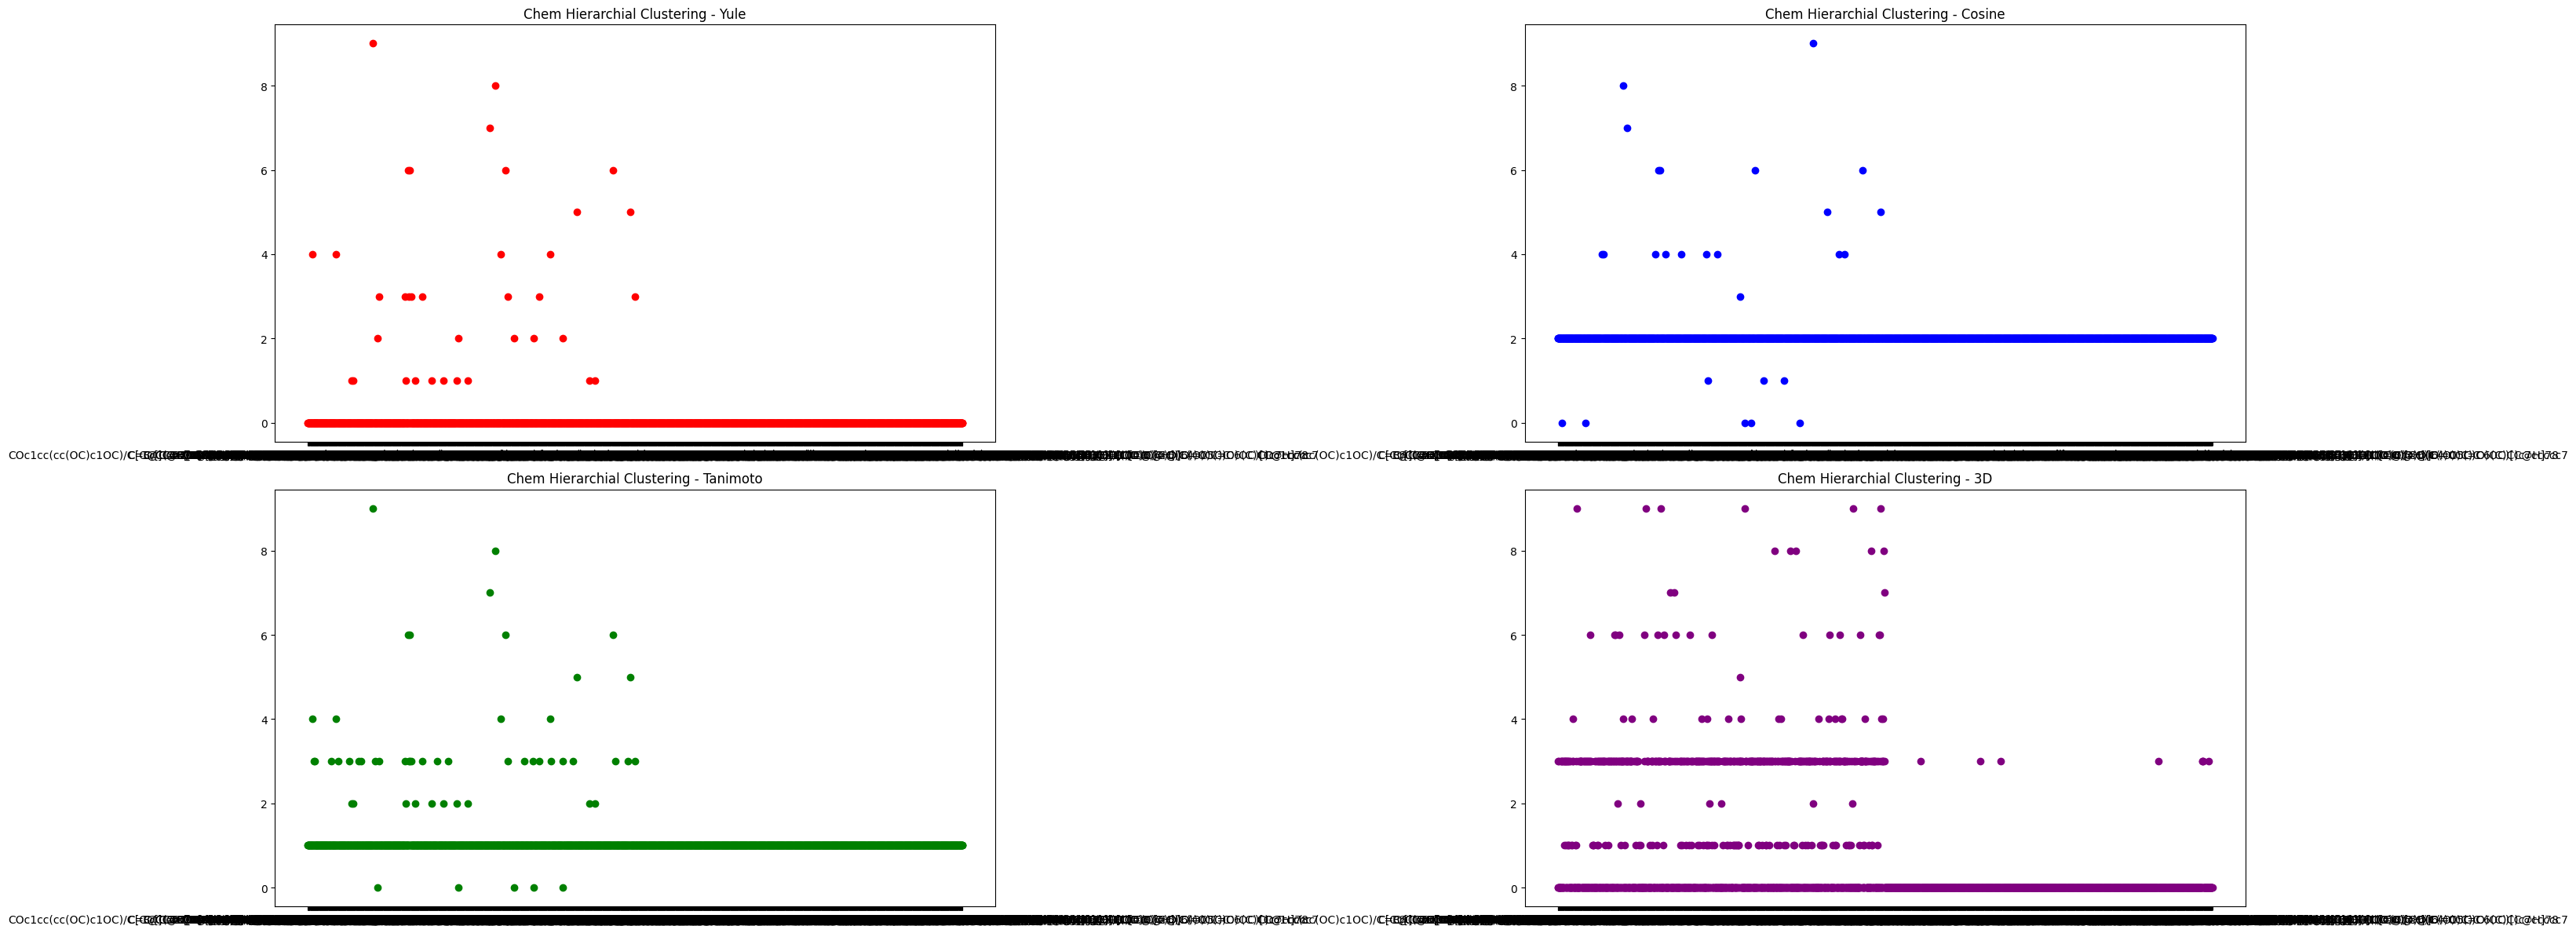

In [7]:
n_clusters = 10
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
cluster_labels1 = clustering.fit_predict(yule_matrix)
cluster_labels2 = clustering.fit_predict(cosine_matrix)
cluster_labels3 = clustering.fit_predict(tanimoto_matrix)
cluster_labels4 = clustering.fit_predict(threed_matrix)
fig, axs = plt.subplots(2, 2, figsize=(32, 12))
axs[0, 0].scatter(X_train['smiles'], cluster_labels1, color='red')
axs[0, 0].set_title('Chem Hierarchial Clustering - Yule')
axs[0, 1].scatter(X_train['smiles'], cluster_labels2, color='blue')
axs[0, 1].set_title('Chem Hierarchial Clustering - Cosine')
axs[1, 0].scatter(X_train['smiles'], cluster_labels3, color='green')
axs[1, 0].set_title('Chem Hierarchial Clustering - Tanimoto')
axs[1, 1].scatter(X_train['smiles'], cluster_labels4, color='purple')
axs[1, 1].set_title('Chem Hierarchial Clustering - 3D')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

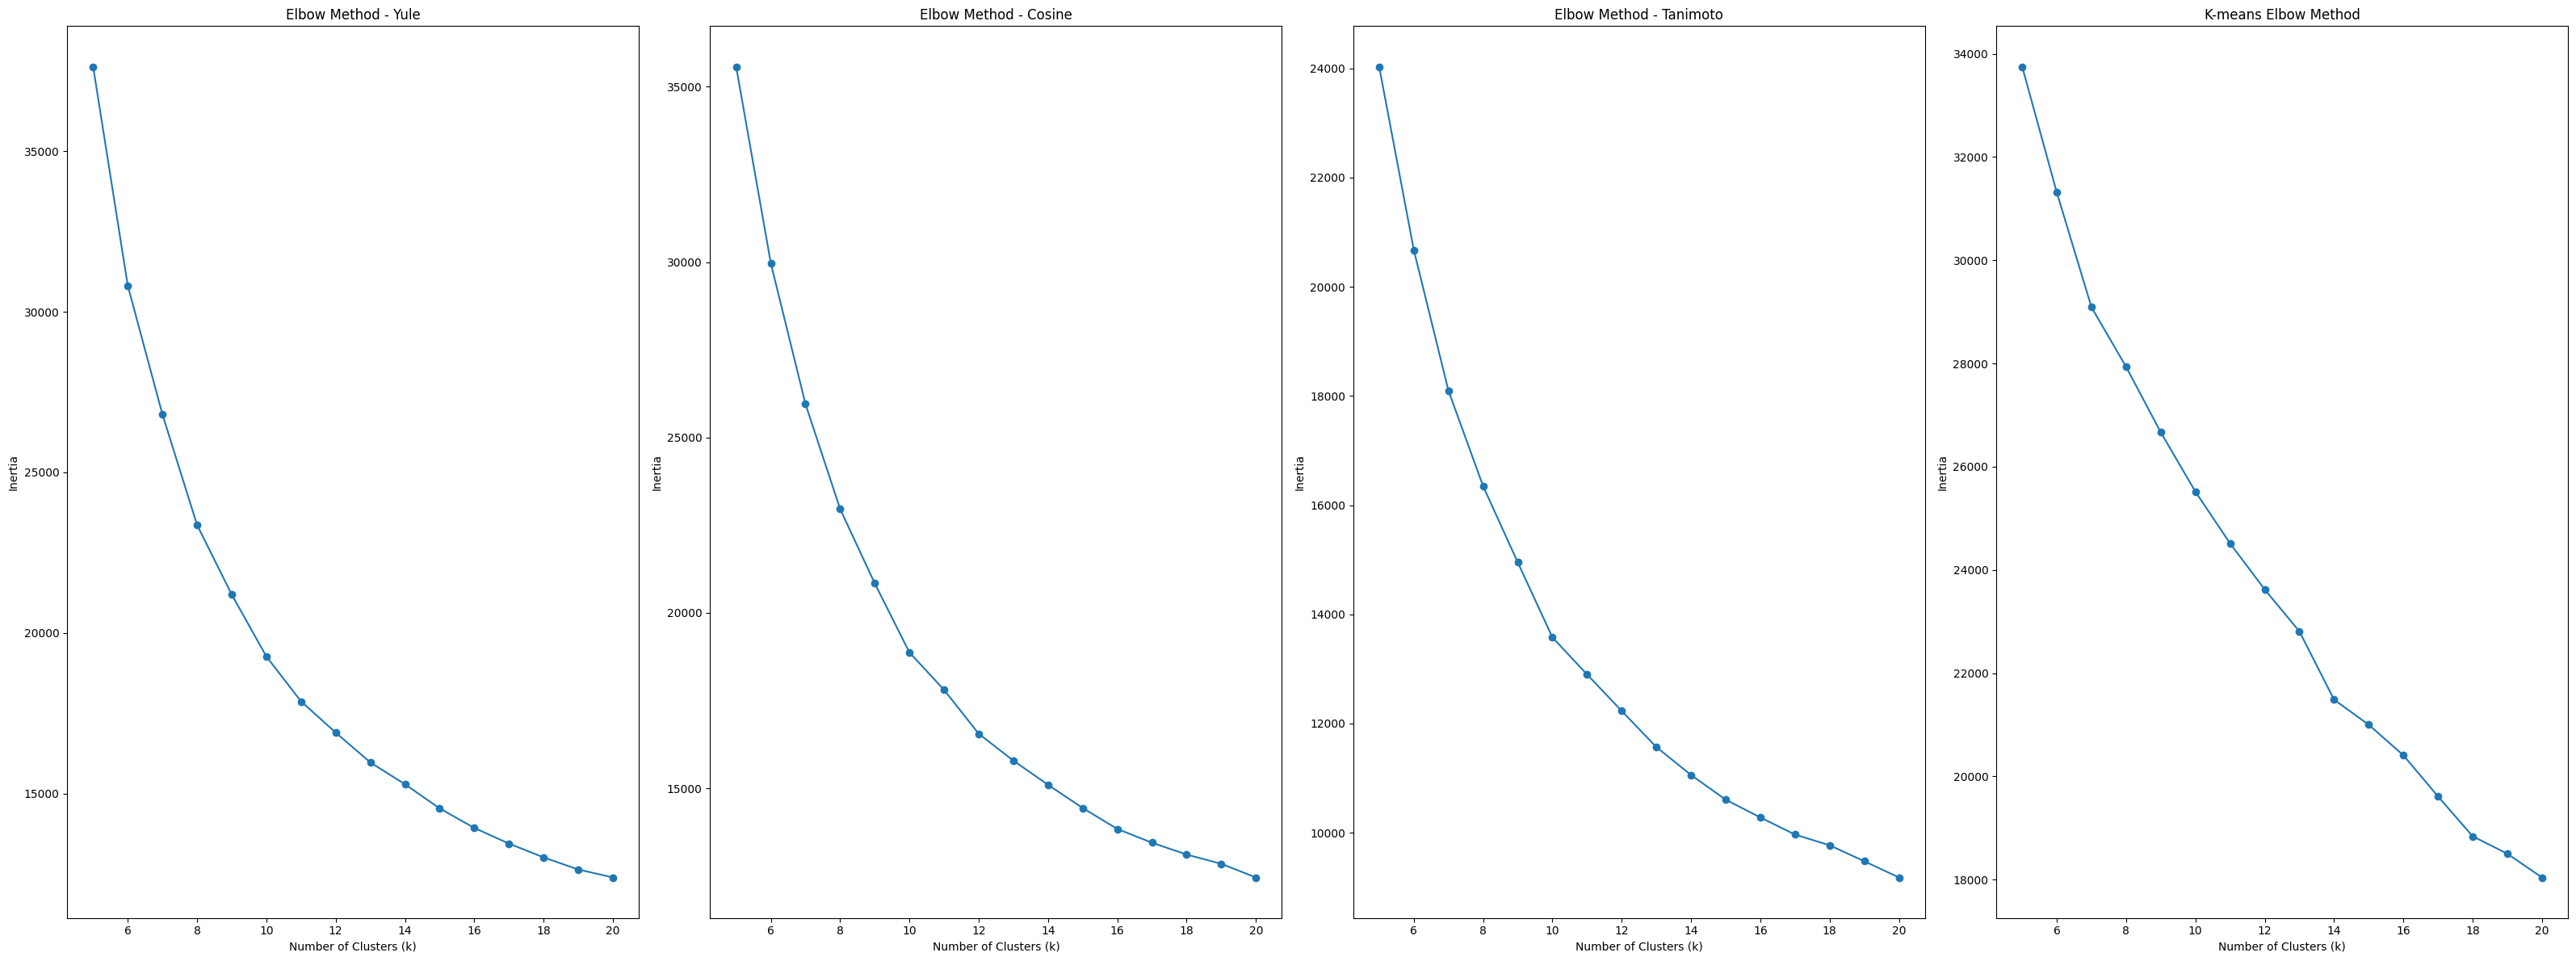

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 12))

inertias1 = kmeans(yule_matrix)
inertias2 = kmeans(cosine_matrix)
inertias3 = kmeans(tanimoto_matrix)
inertias4 = kmeans(threed_matrix)

axes[0].plot(range(5, len(inertias1)+5), inertias1, marker='o')
axes[0].set_title(f'Elbow Method - Yule')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[1].plot(range(5, len(inertias2)+5), inertias2, marker='o')
axes[1].set_title(f'Elbow Method - Cosine')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Inertia')
axes[2].plot(range(5, len(inertias3)+5), inertias3, marker='o')
axes[2].set_title(f'Elbow Method - Tanimoto')
axes[2].set_xlabel('Number of Clusters (k)')
axes[2].set_ylabel('Inertia')
axes[3].plot(range(5, len(inertias4)+5), inertias4, marker='o')
axes[3].set_title(f'Elbow Method - 3D')
axes[3].set_xlabel('Number of Clusters (k)')
axes[3].set_ylabel('Inertia')
plt.title('K-means Elbow Method')
plt.tight_layout()
plt.show()

In [10]:
from scipy.spatial.distance import cdist
k = 20
kmean = KMeans(n_clusters = k, random_state = 42)
kmean.fit(yule_matrix)
clusterlables_kmean_yule = kmean.labels_
print(clusterlables_kmean_yule)
centroid_coordinates_yule = kmean.cluster_centers_
centroid_indices_yule = [np.argmin(cdist(yule_matrix[np.where(clusterlables_kmean_yule == i)], [centroid_coordinates_yule[i]])) for i in range(k)]
print(centroid_indices_yule)
print(centroid_coordinates_yule)

kmean = KMeans(n_clusters = k, random_state = 42)
kmean.fit(cosine_matrix)
clusterlables_kmean_cosine = kmean.labels_
print(clusterlables_kmean_cosine)
centroid_coordinates_cosine = kmean.cluster_centers_
centroid_indices_cosine = [np.argmin(cdist(cosine_matrix[np.where(clusterlables_kmean_cosine == i)], [centroid_coordinates_cosine[i]])) for i in range(k)]
print(centroid_indices_cosine)
print(centroid_coordinates_cosine)

kmean = KMeans(n_clusters = k, random_state = 42)
kmean.fit(tanimoto_matrix)
clusterlables_kmean_tanimoto = kmean.labels_
print(clusterlables_kmean_tanimoto)
centroid_coordinates_tanimoto = kmean.cluster_centers_
centroid_indices_tanimoto = [np.argmin(cdist(tanimoto_matrix[np.where(clusterlables_kmean_tanimoto == i)], [centroid_coordinates_tanimoto[i]])) for i in range(k)]
print(centroid_indices_tanimoto)
print(centroid_coordinates_tanimoto)

kmean = KMeans(n_clusters = k, random_state = 42)
kmean.fit(threed_matrix)
clusterlables_kmean_threed = kmean.labels_
print(clusterlables_kmean_threed)
centroid_coordinates_threed = kmean.cluster_centers_
centroid_indices_threed = [np.argmin(cdist(threed_matrix[np.where(clusterlables_kmean_threed == i)], [centroid_coordinates_threed[i]])) for i in range(k)]
print(centroid_indices_threed)
print(centroid_coordinates_threed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 4  6  2 ... 13 16  1]
[49, 185, 72, 35, 95, 3, 31, 11, 0, 87, 69, 158, 101, 92, 9, 153, 83, 137, 19, 69]
[[ 6.77136674e-01  8.92777375e-01  8.18396878e-01 ...  5.89132208e-01
   9.19627500e-01  5.96344952e-01]
 [ 4.65203140e-01  9.06960911e-01  8.63999126e-01 ... -6.10622664e-16
  -2.10942375e-15 -5.55111512e-17]
 [ 8.15702777e-01  8.54376098e-01  7.99851906e-01 ...  7.67725180e-01
   9.01183469e-01  7.98170785e-01]
 ...
 [ 6.29595590e-01  9.09243234e-01  8.75064641e-01 ...  6.88015647e-01
   9.27066459e-01  5.81088620e-01]
 [ 4.89231406e-01  9.11365495e-01  8.59957849e-01 ...  6.48061569e-01
   9.26133857e-01  4.92671430e-01]
 [ 4.98909181e-01  8.99546969e-01  8.56339787e-01 ...  6.37683516e-01
   9.18757666e-01  4.45484645e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 1  7 17 ... 15  6  0]
[277, 102, 5, 0, 110, 3, 69, 30, 25, 44, 58, 10, 128, 66, 41, 20, 60, 45, 150, 122]
[[ 4.63886785e-01  8.57214346e-01  8.22104318e-01 ... -9.43689571e-16
   2.05391260e-15 -1.33226763e-15]
 [ 4.27406658e-01  8.74852996e-01  8.44732113e-01 ...  6.94538702e-01
   8.80848537e-01  4.84320134e-01]
 [ 7.53416351e-01  8.70957329e-01  8.56894655e-01 ...  7.40317293e-01
   8.92362968e-01  7.15069535e-01]
 ...
 [ 8.21500521e-01  8.05840319e-01  7.38254712e-01 ...  7.26943249e-01
   8.73765746e-01  7.91075199e-01]
 [ 6.17144917e-01  8.50439675e-01  8.22890576e-01 ...  4.99600361e-16
  -8.32667268e-16 -2.77555756e-16]
 [ 6.11667627e-01  8.59465131e-01  8.31518957e-01 ...  6.76882391e-01
   8.79870801e-01  5.65812245e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 6 11  3 ... 14  4  0]
[66, 77, 0, 73, 101, 0, 120, 32, 3, 18, 70, 25, 12, 21, 87, 47, 12, 114, 85, 22]
[[ 6.62155941e-01  9.49489176e-01  9.22448320e-01 ... -4.44089210e-16
  -1.66533454e-15  5.55111512e-17]
 [ 7.80173038e-01  9.47705577e-01  9.20178544e-01 ...  7.74023883e-01
   9.59894437e-01  7.23932405e-01]
 [ 0.00000000e+00  0.00000000e+00  1.11022302e-16 ...  0.00000000e+00
   5.55111512e-17  5.55111512e-17]
 ...
 [ 6.66053569e-01  9.49274718e-01  9.22958111e-01 ...  7.71703143e-01
   9.58471773e-01  6.17096023e-01]
 [ 7.73371115e-01  9.49645668e-01  9.27662452e-01 ... -1.16573418e-15
  -1.44328993e-15  1.66533454e-16]
 [ 7.35934809e-01  9.49396704e-01  9.18693965e-01 ... -1.11022302e-15
  -9.99200722e-16  1.11022302e-16]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 7 12 18 ...  2 17 19]
[240, 17, 19, 79, 0, 52, 8, 151, 257, 23, 66, 31, 43, 11, 87, 38, 18, 53, 21, 21]
[[ 7.88319083e-01  9.37078907e-01  9.41162569e-01 ...  1.88737914e-15
  -1.83186799e-15 -1.11022302e-16]
 [ 8.62033718e-01  8.72472076e-01  8.78620415e-01 ...  8.27621011e-01
   8.16073593e-01  8.83895140e-01]
 [ 8.90825926e-01  8.51143726e-01  6.45079708e-01 ...  8.88178420e-16
   3.88578059e-16  8.32667268e-16]
 ...
 [ 8.66131258e-01  8.59398300e-01  8.23349339e-01 ...  2.05391260e-15
  -2.27595720e-15 -4.44089210e-16]
 [ 8.38937169e-01  8.32171874e-01  7.76466983e-01 ...  6.54105439e-01
   6.98257264e-01  8.80668989e-01]
 [ 7.53954266e-01  9.30475975e-01  9.35937395e-01 ...  1.16573418e-15
   3.88578059e-16  1.11022302e-15]]


In [9]:
print(cluster_labels1)
print(cluster_labels2)
print(cluster_labels3)
print(cluster_labels4)

[0 0 0 ... 0 0 0]
[2 2 2 ... 2 2 2]
[1 1 1 ... 1 1 1]
[0 0 3 ... 0 0 0]


In [11]:
no_test = len(X_test)
print(no_test)
count_yule = np.zeros(k)
count_tanimoto = np.zeros(k)
count_cosine = np.zeros(k)
count_threed = np.zeros(k)
numer_yule = np.zeros((no_test, k))
numer_tanimoto = np.zeros((no_test, k))
numer_cosine = np.zeros((no_test, k))
numer_threed = np.zeros((no_test, k))
numer_tversky = np.zeros((no_test, k))

for i in range(no_test):
    molA = X_test['Molecule'].iloc[i]
    if(molA is None):
        continue
    fpA = X_test['FingerPrint'].iloc[i]
    fpA_3d = X_test['FingerPrint_3d'].iloc[i]
    for j in range(no_mol):
        molB = X_train['Molecule'].iloc[j]
        if(molB is None):
            continue
        fpB = X_train['FingerPrint'].iloc[j]
        fpB_3d = X_train['FingerPrint_3d'].iloc[j]
        m, n = CalculateYuleAndCosine(fpA, fpB)
        numer_yule[i][clusterlables_kmean_yule[j]] += (1-m)*100000
        numer_cosine[i][clusterlables_kmean_cosine[j]] += (1-n)*100000
        numer_tanimoto[i][clusterlables_kmean_tanimoto[j]] += (1-DataStructs.TanimotoSimilarity(fpA, fpB))*100000
        numer_threed[i][clusterlables_kmean_threed[j]] += (1-CalculateThreeDimTanimoto(fpA_3d, fpB_3d))*100000
        numer_tversky[i][clusterlables_kmean_tanimoto[j]] += (1-CalculateTversky(fpA_3d, fpB_3d))*100000
        if(i == 0):
            count_yule[clusterlables_kmean_yule[j]] += 1
            count_tanimoto[clusterlables_kmean_tanimoto[j]] += 1
            count_cosine[clusterlables_kmean_cosine[j]] += 1
            count_threed[clusterlables_kmean_threed[j]] += 1

avg_yule = numer_yule / count_yule
avg_tanimoto = numer_tanimoto / count_tanimoto #np.divide()
avg_cosine = numer_cosine / count_cosine
avg_threed = numer_threed / count_threed
avg_tversky = numer_tversky / count_tanimoto

print(len(avg_yule))
print(avg_yule)
print(avg_tanimoto)
print(avg_cosine)
print(avg_threed)
print(avg_tversky[0][3])

ktest_yulelabel = np.argmin(avg_yule, axis = 1)
ktest_tanimotolabel = np.argmin(avg_tanimoto, axis = 1)
ktest_cosinelabel = np.argmin(avg_cosine, axis = 1)
ktest_threedlabel = np.argmin(avg_threed, axis = 1)
ktest_tverskylabel = np.argmin(avg_tversky, axis = 1)

print(len(ktest_yulelabel))
print(ktest_yulelabel)
print(ktest_tanimotolabel)
print(ktest_cosinelabel)
print(ktest_threedlabel)
print(ktest_tverskylabel)

609
609
[[44358.98540495 51456.65798828 76726.37400931 ... 52388.27263506
  44656.62921204 45118.83610411]
 [62255.7473292  56160.89784613 80792.95530926 ... 61838.51491123
  55388.86983967 54879.26680338]
 [59985.97716183 45854.3427952  78581.97832792 ... 55052.19290785
  37906.14870734 46614.04735855]
 ...
 [65581.35124912 77878.53959151 77586.2935144  ... 79468.19670196
  77507.67466188 75813.89938072]
 [40287.6822197  51850.00923324 75999.74950514 ... 53518.99761887
  46519.17646976 44777.99341693]
 [62343.17747483 77524.6878373  78917.8902674  ... 78400.18623744
  76422.32000174 75784.6558761 ]]
[[60546.0656292  63021.88648141            nan ... 59744.06363486
  65411.74610887 45703.08069047]
 [70807.01539274 73324.43301952            nan ... 70705.93597202
  75363.97607197 69477.6869729 ]
 [61381.67785642 73140.72564151            nan ... 61058.09663494
  71175.78114027 65502.36867006]
 ...
 [86120.68737587 84869.09824706            nan ... 86187.07433929
  87155.09224655 83060.0

<ipython-input-11-a6b75fa0d512>:37: RuntimeWarning: invalid value encountered in divide
  avg_yule = numer_yule / count_yule
<ipython-input-11-a6b75fa0d512>:38: RuntimeWarning: invalid value encountered in divide
  avg_tanimoto = numer_tanimoto / count_tanimoto #np.divide()
<ipython-input-11-a6b75fa0d512>:39: RuntimeWarning: invalid value encountered in divide
  avg_cosine = numer_cosine / count_cosine
<ipython-input-11-a6b75fa0d512>:40: RuntimeWarning: invalid value encountered in divide
  avg_threed = numer_threed / count_threed
<ipython-input-11-a6b75fa0d512>:41: RuntimeWarning: invalid value encountered in divide
  avg_tversky = numer_tversky / count_tanimoto


In [12]:
simtest_yule = np.zeros((no_test, k))
simtest_cosine = np.zeros((no_test, k))
simtest_tanimoto = np.zeros((no_test, k))
simtest_tversky = np.zeros((no_test, k))
simtest_threed = np.zeros((no_test, k))
no_test = len(X_test)
print(no_test)
for i in range(no_test):

    molA = X_test['Molecule'].iloc[i]
    if(molA is None):
        continue
    fpA = X_test['FingerPrint'].iloc[i]
    fpA_3d = X_test['FingerPrint_3d'].iloc[i]

    for j in range(k):

        molB = X_train['Molecule'].iloc[centroid_indices_yule[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices_yule[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices_yule[j]]
            m, n = CalculateYuleAndCosine(fpA, fpB)
            simtest_yule[i][j] = 1-m

        molB = X_train['Molecule'].iloc[centroid_indices_cosine[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices_cosine[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices_cosine[j]]
            m, n = CalculateYuleAndCosine(fpA, fpB)
            simtest_cosine[i][j] = 1-n

        molB = X_train['Molecule'].iloc[centroid_indices_tanimoto[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices_tanimoto[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices_tanimoto[j]]
            simtest_tanimoto[i][j] = 1-DataStructs.TanimotoSimilarity(fpA, fpB)
            simtest_tversky[i][j] = 1-CalculateTversky(fpA_3d, fpB_3d)

        molB = X_train['Molecule'].iloc[centroid_indices_threed[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices_threed[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices_threed[j]]
            simtest_threed[i][j] = 1-CalculateThreeDimTanimoto(fpA_3d, fpB_3d)

print(simtest_yule, '\n')
print(simtest_tanimoto, '\n')
print(simtest_cosine, '\n')
print(simtest_threed, '\n')
print(simtest_tversky, '\n')

kmean_yulelabel = np.argmin(simtest_yule, axis = 1)
kmean_tanimotolabel = np.argmin(simtest_tanimoto, axis = 1)
kmean_cosinelabel = np.argmin(simtest_cosine, axis = 1)
kmean_threedlabel = np.argmin(simtest_threed, axis = 1)
kmean_tverskylabel = np.argmin(simtest_tversky, axis = 1)

print(kmean_yulelabel, '\n')
print(kmean_tanimotolabel, '\n')
print(kmean_cosinelabel, '\n')
print(kmean_threedlabel, '\n')
print(kmean_tverskylabel, '\n')

609
[[0.64417845 0.30709246 0.38974134 ... 0.38043478 0.76307877 0.        ]
 [0.63704397 0.53846154 0.5952381  ... 0.59933592 0.78299776 0.        ]
 [0.55474453 0.49871861 0.46328785 ... 0.57579062 0.71986971 0.        ]
 ...
 [0.81496599 0.7509434  0.76740238 ... 0.63747454 0.86428571 0.        ]
 [0.6453012  0.2887372  0.44638602 ... 0.31389975 0.78736842 0.        ]
 [0.8150134  0.74266084 0.76619008 ... 0.54716981 0.8704028  0.        ]] 

[[0.61392792 0.79398592 0.72769029 ... 0.81416504 0.94097693 0.85752508]
 [0.68305531 0.8375     0.70288248 ... 0.8534202  0.93261456 0.85487805]
 [0.64024933 0.84077079 0.65202703 ... 0.84294872 0.93636364 0.80740741]
 ...
 [0.8756027  0.72222222 0.88829787 ... 0.77210884 0.93240093 0.94599303]
 [0.61393805 0.76556137 0.74292317 ... 0.79485681 0.94048321 0.85990621]
 [0.86717998 0.71056911 0.88845144 ... 0.72743056 0.94130926 0.92119089]] 

[[0.42547464 0.4317452  0.23404652 ... 0.51944199 0.47451526 0.2800654 ]
 [0.60513058 0.58682546 0.48210

In [13]:
centroid_coords1 = [np.mean(yule_matrix[np.where(cluster_labels1 == j)]) for j in range(n_clusters)]
print(centroid_coords1)
print(len(centroid_coords1))
centroid_coords2 = [np.mean(cosine_matrix[np.where(cluster_labels2 == j)]) for j in range(n_clusters)]
print(centroid_coords2)
centroid_coords3 = [np.mean(tanimoto_matrix[np.where(cluster_labels3 == j)]) for j in range(n_clusters)]
print(centroid_coords3)
centroid_coords4 = [np.mean(threed_matrix[np.where(cluster_labels4 == j)]) for j in range(n_clusters)]
print(centroid_coords4)

centroid_indices1 = []
for i in range(n_clusters):
    ind = np.where(cluster_labels1 == i)
    if(len(ind[0])==0):
        centroid_indices1.append(None)
        continue
    men = np.mean(yule_matrix[ind], axis = 1)
    leng = len(ind)
    coord = [centroid_coords1[i] for _ in range(leng)]
    index = np.argmin(abs(coord - men))
    centroid_indices1.append(ind[0][index])
print(centroid_indices1)

centroid_indices2 = []
for i in range(n_clusters):
    ind = np.where(cluster_labels2 == i)
    if(len(ind[0])==0):
        centroid_indices2.append(None)
        continue
    men = np.mean(cosine_matrix[ind], axis = 1)
    leng = len(ind)
    coord = [centroid_coords2[i] for _ in range(leng)]
    index = np.argmin(abs(coord - men))
    centroid_indices2.append(ind[0][index])
print(centroid_indices2)

centroid_indices3 = []
for i in range(n_clusters):
    ind = np.where(cluster_labels3 == i)
    if(len(ind[0])==0):
        centroid_indices3.append(None)
        continue
    men = np.mean(tanimoto_matrix[ind], axis = 1)
    leng = len(ind)
    coord = [centroid_coords3[i] for _ in range(leng)]
    index = np.argmin(abs(coord - men))
    centroid_indices3.append(ind[0][index])
print(centroid_indices3)

centroid_indices4 = []
for i in range(n_clusters):
    ind = np.where(cluster_labels4 == i)
    if(len(ind[0])==0):
        centroid_indices4.append(None)
        continue
    men = np.mean(threed_matrix[ind], axis = 1)
    leng = len(ind)
    coord = [centroid_coords4[i] for _ in range(leng)]
    index = np.argmin(abs(coord - men))
    centroid_indices4.append(ind[0][index])
print(centroid_indices4)

[0.4979634763438694, 0.9612258684535541, 0.8964819502941216, 0.8924120764911435, 0.9760818588465278, 0.9848515831448228, 0.9435680485325281, 0.9917961876220626, 0.9219737035579358, 0.9274391837865256]
10
[0.9304459870281188, 0.8594271796096117, 0.4828273547314235, 0.9754093180811827, 0.9157337176883873, 0.9605153624530803, 0.9013281397739163, 0.8567114509912089, 0.8849294957086935, 0.852994104368601]
[0.9424107341050181, 0.5836319901008784, 0.9768903258511485, 0.9302253287530468, 0.9846116853840148, 0.989268673265732, 0.9674757295993439, 0.9928118823692644, 0.9564698771171146, 0.9593694349416173]
[0.5631821423452208, 0.8471521822805673, 0.8934653417772974, 0.837149156381126, 0.8695044022811818, 0.9751086844651439, 0.8626401209422618, 0.9091456360836991, 0.8868426681245987, 0.8855280769712526]
[1741, 363, 765, 265, 104, 1000, 734, 676, 696, 242]
[899, 765, 471, 676, 594, 1198, 734, 259, 242, 948]
[765, 1741, 363, 743, 104, 1000, 734, 676, 696, 242]
[2029, 132, 608, 77, 968, 676, 492, 43

In [14]:
simtest_yule2 = np.zeros((no_test, n_clusters))
simtest_cosine2 = np.zeros((no_test, n_clusters))
simtest_tanimoto2 = np.zeros((no_test, n_clusters))
simtest_tversky2 = np.zeros((no_test, n_clusters))
simtest_threed2 = np.zeros((no_test, n_clusters))
no_test = len(X_test)
print(no_test)
for i in range(no_test):

    molA = X_test['Molecule'].iloc[i]
    if(molA is None):
        continue
    fpA = X_test['FingerPrint'].iloc[i]
    fpA_3d = X_test['FingerPrint_3d'].iloc[i]

    for j in range(n_clusters):

        molB = X_train['Molecule'].iloc[centroid_indices1[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices1[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices1[j]]
            m, n = CalculateYuleAndCosine(fpA, fpB)
            simtest_yule2[i][j] = 1-m

        molB = X_train['Molecule'].iloc[centroid_indices2[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices2[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices2[j]]
            m, n = CalculateYuleAndCosine(fpA, fpB)
            simtest_cosine2[i][j] = 1-n

        molB = X_train['Molecule'].iloc[centroid_indices3[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices3[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices3[j]]
            simtest_tanimoto2[i][j] = 1-DataStructs.TanimotoSimilarity(fpA, fpB)
            simtest_tversky2[i][j] = 1-CalculateTversky(fpA_3d, fpB_3d)

        molB = X_train['Molecule'].iloc[centroid_indices4[j]]
        if(molB is not None):
            fpB = X_train['FingerPrint'].iloc[centroid_indices4[j]]
            fpB_3d = X_train['FingerPrint_3d'].iloc[centroid_indices4[j]]
            simtest_threed2[i][j] = 1-CalculateThreeDimTanimoto(fpA_3d, fpB_3d)

print(simtest_yule2, '\n')
print(simtest_tanimoto2, '\n')
print(simtest_cosine2, '\n')
print(simtest_threed2, '\n')
print(simtest_tversky2, '\n')

agglo_yulelabel = np.argmin(simtest_yule2, axis = 1)
agglo_tanimotolabel = np.argmin(simtest_tanimoto2, axis = 1)
agglo_cosinelabel = np.argmin(simtest_cosine2, axis = 1)
agglo_threedlabel = np.argmin(simtest_threed2, axis = 1)
agglo_tverskylabel = np.argmin(simtest_tversky2, axis = 1)

print(agglo_yulelabel, '\n')
print(agglo_tanimotolabel, '\n')
print(agglo_cosinelabel, '\n')
print(agglo_threedlabel, '\n')
print(agglo_tverskylabel, '\n')
print(len(agglo_yulelabel))

609
[[0.99581006 0.98474341 0.90488599 ... 0.9986014  0.93071286 0.93578595]
 [0.99396682 0.97622585 0.91122715 ... 0.99394856 0.93989071 0.93112948]
 [0.9942029  0.97428571 0.89407314 ... 0.99709302 0.91831357 0.93359894]
 ...
 [1.         0.94690265 0.86574074 ... 1.         0.91959799 0.93367347]
 [0.99520671 0.98570578 0.89954853 ... 0.99760048 0.93325662 0.94110855]
 [1.         0.94857143 0.89616253 ... 0.99408284 0.92665037 0.94540943]] 

[[0.9500684  0.99790063 0.99231307 ... 0.99930021 0.96411318 0.96682792]
 [0.95355191 0.99697428 0.98796992 ... 0.9969651  0.96901408 0.96433666]
 [0.94407457 0.99709302 0.9869754  ... 0.9985444  0.95741758 0.96565934]
 ...
 [0.9280397  1.         0.97272727 ... 1.         0.95811518 0.96569921]
 [0.94711824 0.9975976  0.99280144 ... 0.9987988  0.96547619 0.96966092]
 [0.9452381  1.         0.97360704 ... 0.99703264 0.96192893 0.97193878]] 

[[0.91338013 0.81324731 0.20411175 ... 0.78047479 0.84481858 0.77004187]
 [0.95749719 0.8719604  0.43785

In [15]:
def kmean_avgsimdf(m):

    ind1 = np.where(clusterlables_kmean_yule == m)[0]
    ind2 = np.where(clusterlables_kmean_cosine == m)[0]
    ind3 = np.where(clusterlables_kmean_tanimoto == m)[0]
    ind4 = np.where(clusterlables_kmean_threed == m)[0]
    df = []
    df.append(np.mean(yule_matrix[ind1], axis = 1))
    df.append(np.mean(cosine_matrix[ind2], axis = 1))
    df.append(np.mean(tanimoto_matrix[ind3], axis = 1))
    df.append(np.mean(threed_matrix[ind4], axis = 1))

    return df

def agglo_avgsimdf(m):

    ind1 = np.where(cluster_labels1 == m)[0]
    ind2 = np.where(cluster_labels2 == m)[0]
    ind3 = np.where(cluster_labels3 == m)[0]
    ind4 = np.where(cluster_labels4 == m)[0]
    df = []
    df.append(np.mean(yule_matrix[ind1], axis = 1))
    df.append(np.mean(cosine_matrix[ind2], axis = 1))
    df.append(np.mean(tanimoto_matrix[ind3], axis = 1))
    df.append(np.mean(threed_matrix[ind4], axis = 1))

    return df

0.37584796416394733
0.25526376099913534
0.1833699117500185
0.2445295732473339
0.32283286198035377


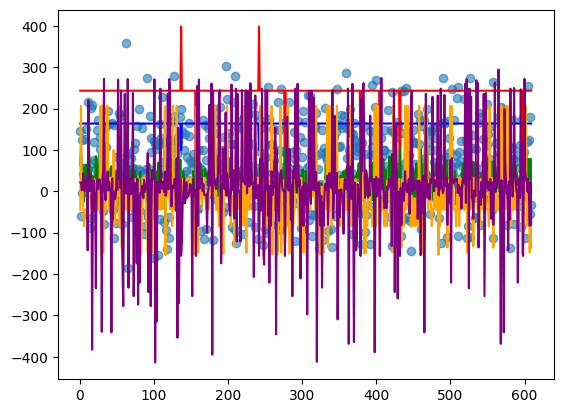

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

no_test = len(X_test)
mpc_pred_kmean_yule = []
mpc_pred_kmean_cosine = []
mpc_pred_kmean_tanimoto = []
mpc_pred_kmean_tversky = []
mpc_pred_kmean_threed = []

model = LinearRegression()

for i in range(no_test):

    cluster_yule = kmean_yulelabel[i]
    ind = np.where(clusterlables_kmean_yule == cluster_yule)[0]
    x_yule = np.mean(yule_matrix[ind], axis = 1).reshape(-1, 1)
    y_yule = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_yule, y_yule)
    mpc_pred_kmean_yule.append(model.predict([[simtest_yule[i][cluster_yule]]])/2)

    cluster_cosine = kmean_cosinelabel[i]
    ind = np.where(clusterlables_kmean_cosine == cluster_cosine)[0]
    x_cosine = np.mean(cosine_matrix[ind], axis = 1).reshape(-1, 1)
    y_cosine = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_cosine, y_cosine)
    mpc_pred_kmean_cosine.append(model.predict([[simtest_cosine[i][cluster_cosine]]])/2)

    cluster_tanimoto = kmean_tanimotolabel[i]
    ind = np.where(clusterlables_kmean_tanimoto == cluster_tanimoto)[0]
    x_tanimoto = np.mean(tanimoto_matrix[ind], axis = 1).reshape(-1, 1)
    y_tanimoto = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_tanimoto, y_tanimoto)
    mpc_pred_kmean_tanimoto.append(model.predict([[simtest_tanimoto[i][cluster_tanimoto]]])/6)
    mpc_pred_kmean_tversky.append(model.predict([[simtest_tversky[i][cluster_tanimoto]]])/6)

    cluster_threed = kmean_threedlabel[i]
    ind = np.where(clusterlables_kmean_threed == cluster_threed)[0]
    x_threed = np.mean(threed_matrix[ind], axis = 1).reshape(-1, 1)
    y_threed = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_threed, y_threed)
    mpc_pred_kmean_threed.append(model.predict([[simtest_threed[i][cluster_tanimoto]]])/6)

mpc_pred_kmean_yule1D = (np.concatenate(mpc_pred_kmean_yule, axis=0)).flatten()
mpc_pred_kmean_cosine1D = (np.concatenate(mpc_pred_kmean_cosine, axis=0)).flatten()
mpc_pred_kmean_tanimoto1D = (np.concatenate(mpc_pred_kmean_tanimoto, axis=0)).flatten()
mpc_pred_kmean_tversky1D = (np.concatenate(mpc_pred_kmean_tversky, axis=0)).flatten()
mpc_pred_kmean_threed1D = (np.concatenate(mpc_pred_kmean_threed, axis=0)).flatten()

#print(mpc_pred_kmean_yule1D)
#print(mpc_pred_kmean_cosine1D)
#print(mpc_pred_kmean_tanimoto1D)
#print(mpc_pred_kmean_tversky1D)
#print(mpc_pred_kmean_threed1D)

data_range = np.max(Y_test.values) - np.min(Y_test.values)

kmean_rmse_yule = (mean_squared_error(mpc_pred_kmean_yule1D, Y_test)**0.5) /data_range
kmean_rmse_cosine = (mean_squared_error(mpc_pred_kmean_cosine1D, Y_test)**0.5) /data_range
kmean_rmse_tanimoto = (mean_squared_error(mpc_pred_kmean_tanimoto1D, Y_test)**0.5) /data_range
kmean_rmse_tversky = (mean_squared_error(mpc_pred_kmean_tversky1D, Y_test)**0.5) /data_range
kmean_rmse_threed = (mean_squared_error(mpc_pred_kmean_threed1D, Y_test)**0.5)/ data_range

print(kmean_rmse_yule)
print(kmean_rmse_cosine)
print(kmean_rmse_tanimoto)
print(kmean_rmse_tversky)
print(kmean_rmse_threed)

dum_x = [i+1 for i in range(len(X_test))]
plt.scatter(dum_x, Y_test.values, alpha=0.6, label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_yule1D, color='red')
plt.plot(dum_x, mpc_pred_kmean_cosine1D, color='blue')
plt.plot(dum_x, mpc_pred_kmean_tanimoto1D, color='green')
plt.plot(dum_x, mpc_pred_kmean_tversky1D, color='orange')
plt.plot(dum_x, mpc_pred_kmean_threed1D, color='purple')
plt.show()

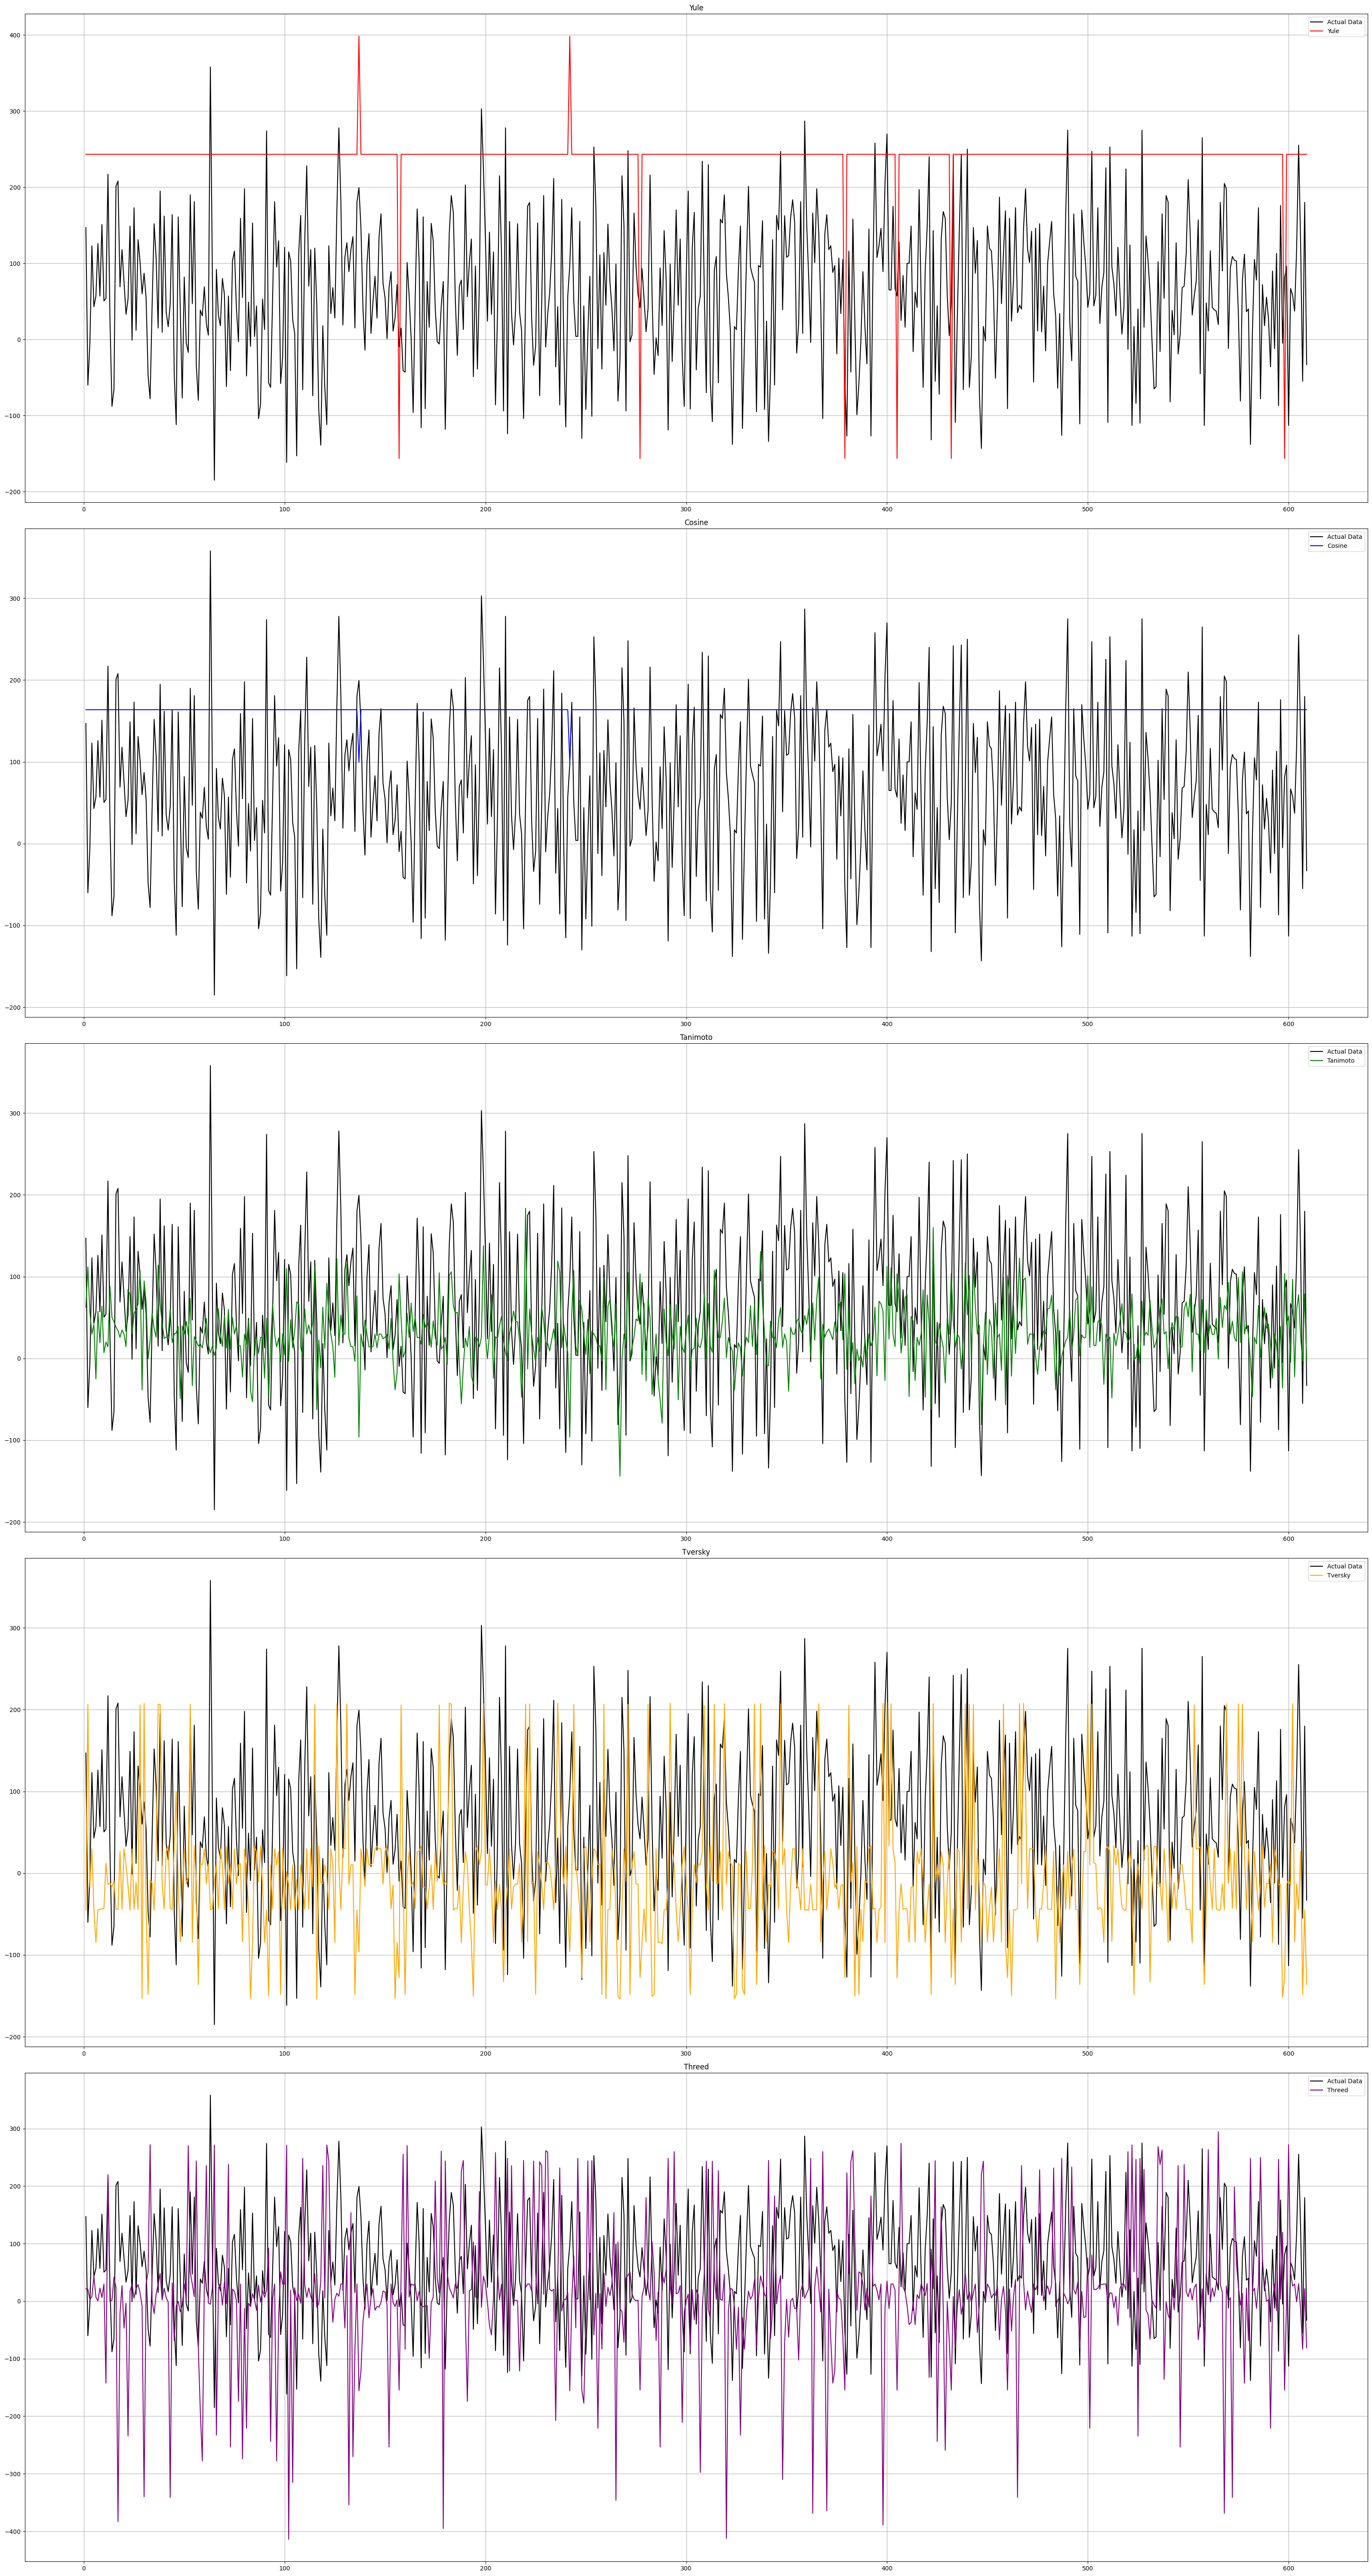

In [17]:
plt.figure(figsize=(32, 60))

# Plot each line in a separate subplot
plt.subplot(511)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_yule1D, color='red', label='Yule')
plt.legend()
plt.grid(True)
plt.title('Yule')

plt.subplot(512)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_cosine1D, color='blue', label='Cosine')
plt.legend()
plt.grid(True)
plt.title('Cosine')

plt.subplot(513)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_tanimoto1D, color='green', label='Tanimoto')
plt.legend()
plt.grid(True)
plt.title('Tanimoto')

plt.subplot(514)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_tversky1D, color='orange', label='Tversky')
plt.legend()
plt.grid(True)
plt.title('Tversky')

plt.subplot(515)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_kmean_threed1D, color='purple', label='Threed')
plt.legend()
plt.grid(True)
plt.title('Threed')

plt.tight_layout()

plt.show()

0.28226432004111884
0.2806375375089301
1.0101861888416486
1.1074534199871338
0.3866809051775003


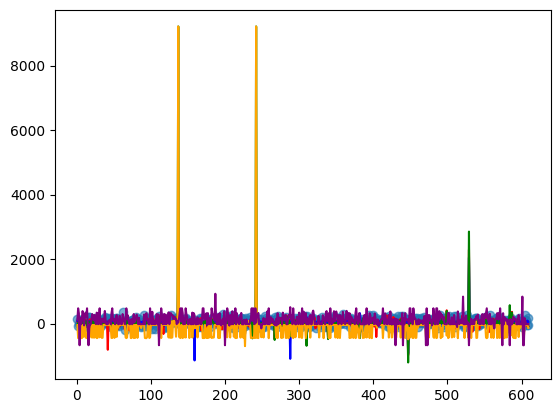

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

no_test = len(X_test)
mpc_pred_agglo_yule = []
mpc_pred_agglo_cosine = []
mpc_pred_agglo_tanimoto = []
mpc_pred_agglo_tversky = []
mpc_pred_agglo_threed = []

model = LinearRegression()

for i in range(no_test):

    cluster_yule = agglo_yulelabel[i]
    ind = np.where(cluster_labels1 == cluster_yule)[0]
    x_yule = np.mean(yule_matrix[ind], axis = 1).reshape(-1, 1)
    y_yule = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_yule, y_yule)
    mpc_pred_agglo_yule.append(model.predict([[simtest_yule2[i][cluster_yule]]]))

    cluster_cosine = agglo_cosinelabel[i]
    ind = np.where(cluster_labels2 == cluster_cosine)[0]
    x_cosine = np.mean(cosine_matrix[ind], axis = 1).reshape(-1, 1)
    y_cosine = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_cosine, y_cosine)
    mpc_pred_agglo_cosine.append(model.predict([[simtest_cosine2[i][cluster_cosine]]]))

    cluster_tanimoto = agglo_tanimotolabel[i]
    ind = np.where(cluster_labels3 == cluster_tanimoto)[0]
    x_tanimoto = np.mean(tanimoto_matrix[ind], axis = 1).reshape(-1, 1)
    y_tanimoto = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_tanimoto, y_tanimoto)
    mpc_pred_agglo_tanimoto.append(model.predict([[simtest_tanimoto2[i][cluster_tanimoto]]]))
    mpc_pred_agglo_tversky.append(model.predict([[simtest_tversky2[i][cluster_tanimoto]]]))

    cluster_threed = agglo_threedlabel[i]
    ind = np.where(cluster_labels4 == cluster_threed)[0]
    x_threed = np.mean(threed_matrix[ind], axis = 1).reshape(-1, 1)
    y_threed = (Y_train.iloc[ind].values).reshape(-1, 1)
    model.fit(x_threed, y_threed)
    mpc_pred_agglo_threed.append(model.predict([[simtest_threed2[i][cluster_tanimoto]]]))

mpc_pred_agglo_yule1D = (np.concatenate(mpc_pred_agglo_yule, axis=0)).flatten()
mpc_pred_agglo_cosine1D = (np.concatenate(mpc_pred_agglo_cosine, axis=0)).flatten()
mpc_pred_agglo_tanimoto1D = (np.concatenate(mpc_pred_agglo_tanimoto, axis=0)).flatten()
mpc_pred_agglo_tversky1D = (np.concatenate(mpc_pred_agglo_tversky, axis=0)).flatten()
mpc_pred_agglo_threed1D = (np.concatenate(mpc_pred_agglo_threed, axis=0)).flatten()

#print(mpc_pred_kmean_yule1D)
#print(mpc_pred_kmean_cosine1D)
#print(mpc_pred_kmean_tanimoto1D)
#print(mpc_pred_kmean_tversky1D)
#print(mpc_pred_kmean_threed1D)

agglo_rmse_yule = mean_squared_error(mpc_pred_agglo_yule1D, Y_test)**0.5 / data_range
agglo_rmse_cosine = mean_squared_error(mpc_pred_agglo_cosine1D, Y_test)**0.5 / data_range
agglo_rmse_tanimoto = mean_squared_error(mpc_pred_agglo_tanimoto1D, Y_test)**0.5 / data_range
agglo_rmse_tversky = mean_squared_error(mpc_pred_agglo_tversky1D, Y_test)**0.5 / data_range
agglo_rmse_threed = mean_squared_error(mpc_pred_agglo_threed1D, Y_test)**0.5 / data_range

print(agglo_rmse_yule)
print(agglo_rmse_cosine)
print(agglo_rmse_tanimoto)
print(agglo_rmse_tversky)
print(agglo_rmse_threed)

dum_x = [i+1 for i in range(len(X_test))]
plt.scatter(dum_x, Y_test.values, alpha=0.6, label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_yule1D, color='red')
plt.plot(dum_x, mpc_pred_agglo_cosine1D, color='blue')
plt.plot(dum_x, mpc_pred_agglo_tanimoto1D, color='green')
plt.plot(dum_x, mpc_pred_agglo_tversky1D, color='orange')
plt.plot(dum_x, mpc_pred_agglo_threed1D, color='purple')
plt.show()

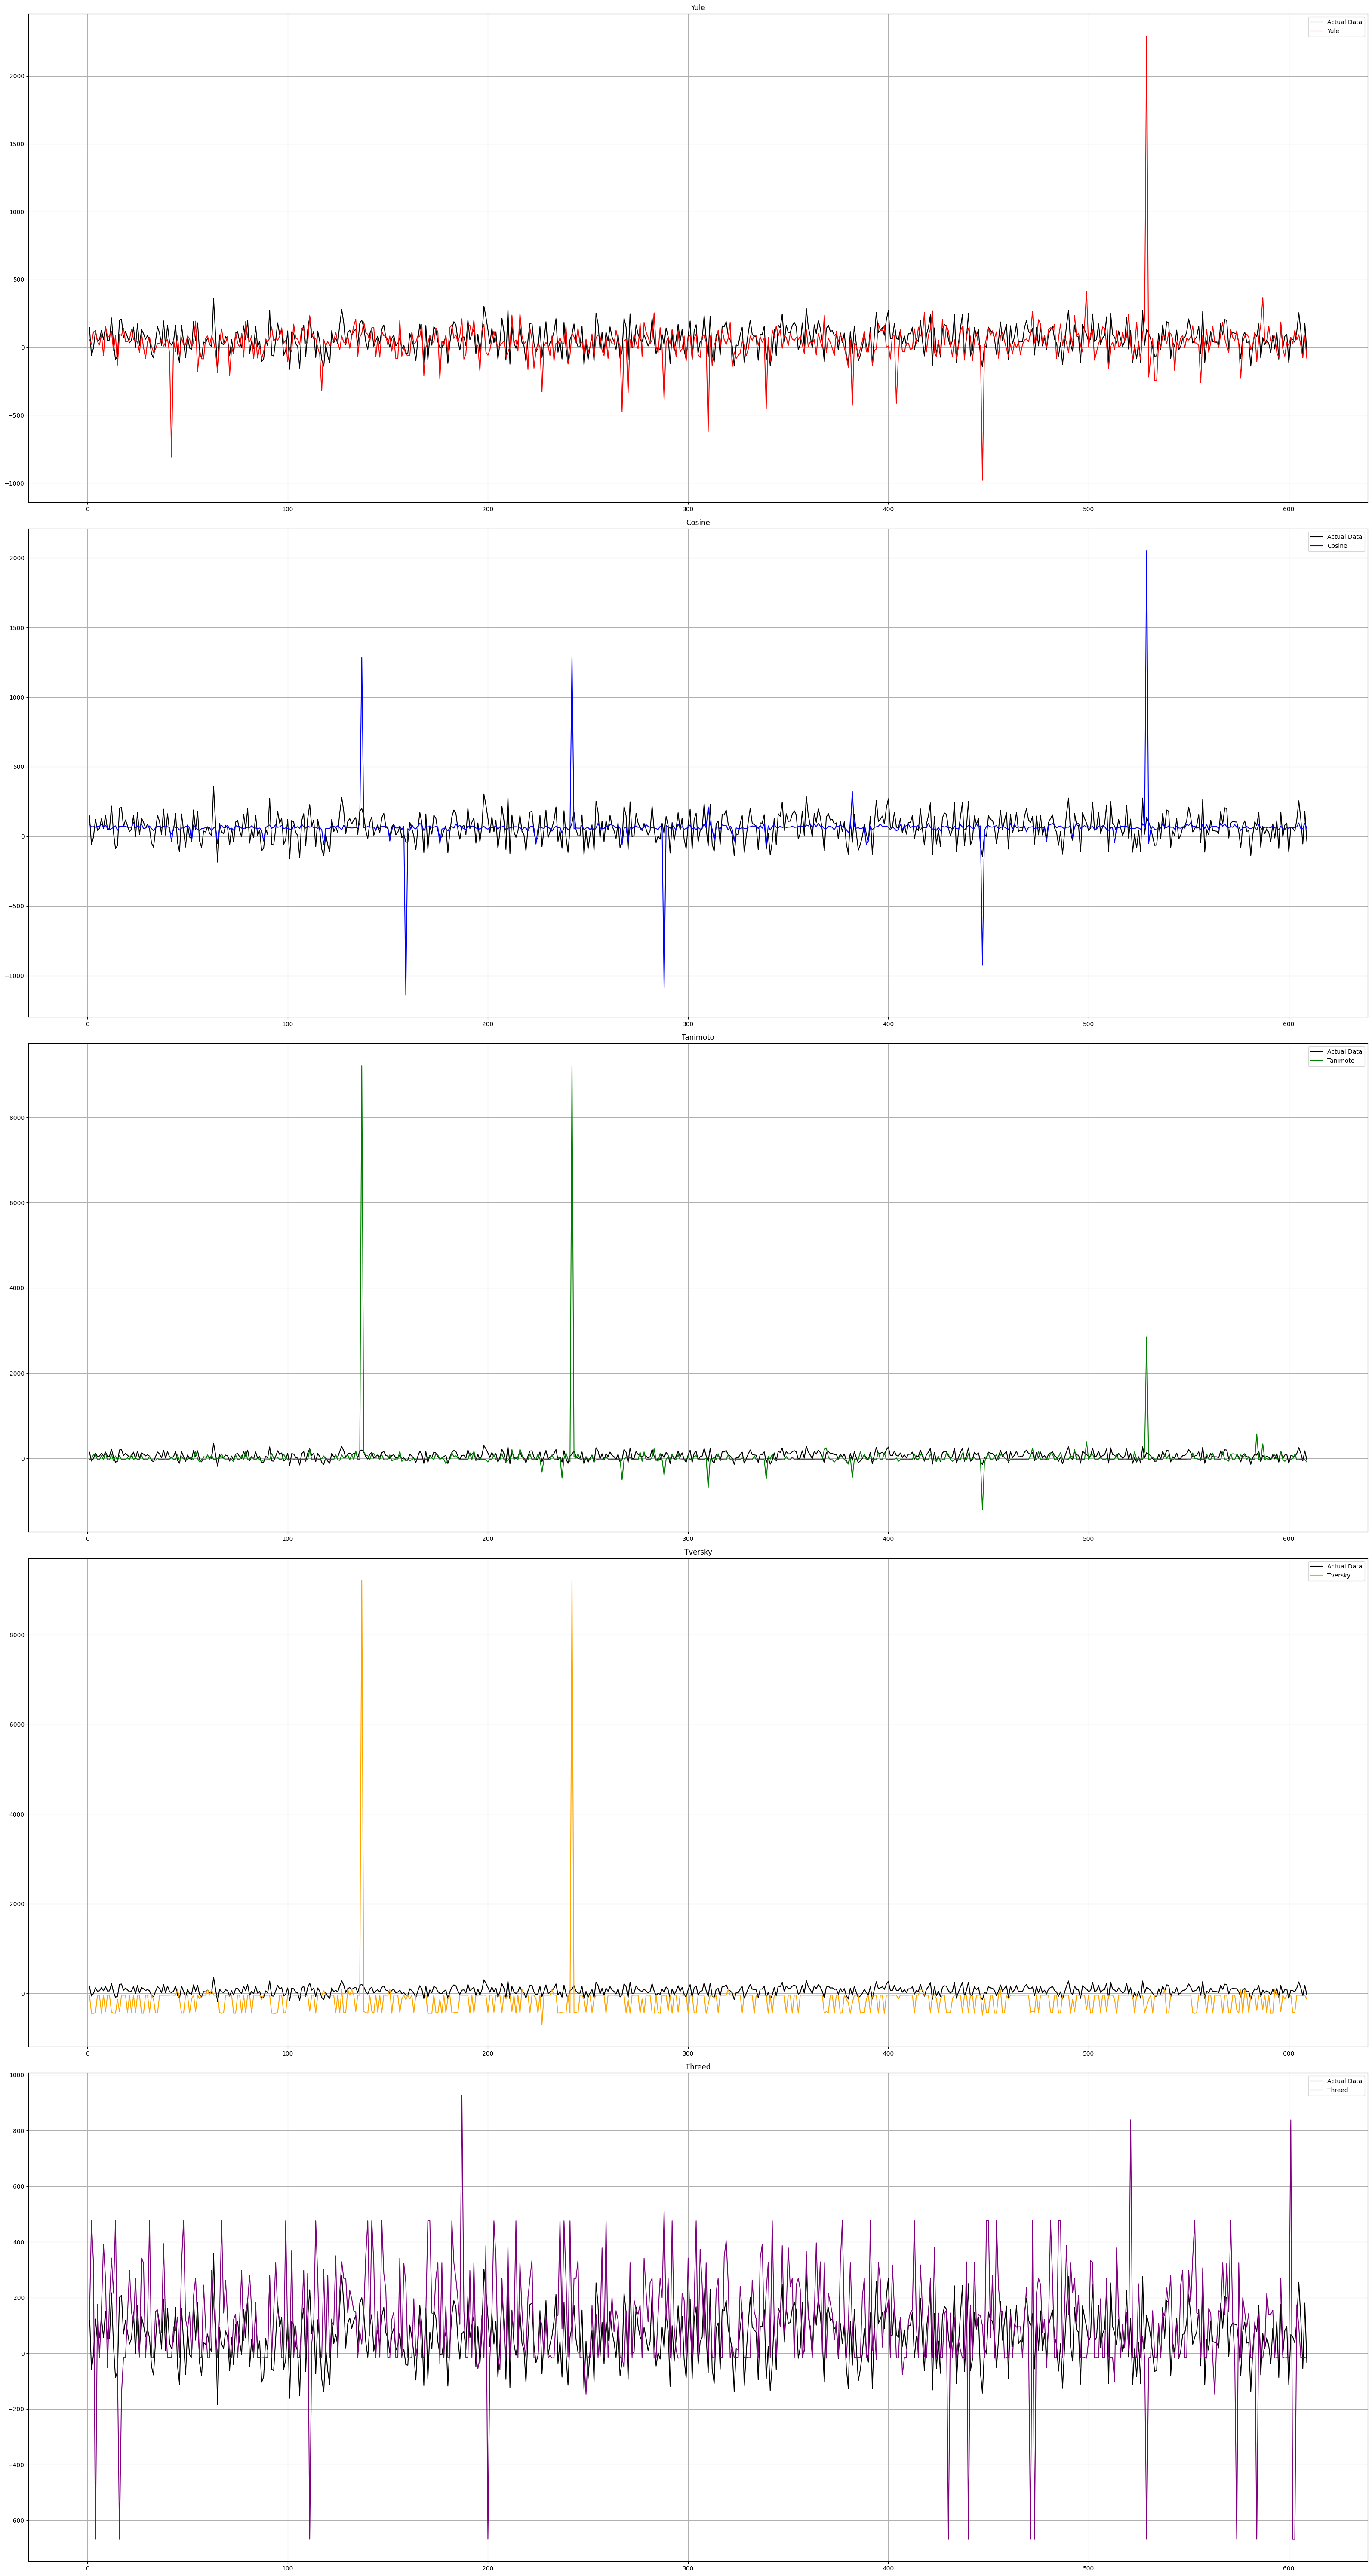

In [20]:
plt.figure(figsize=(32, 60))

# Plot each line in a separate subplot
plt.subplot(511)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_yule1D, color='red', label='Yule')
plt.legend()
plt.grid(True)
plt.title('Yule')

plt.subplot(512)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_cosine1D, color='blue', label='Cosine')
plt.legend()
plt.grid(True)
plt.title('Cosine')

plt.subplot(513)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_tanimoto1D, color='green', label='Tanimoto')
plt.legend()
plt.grid(True)
plt.title('Tanimoto')

plt.subplot(514)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_tversky1D, color='orange', label='Tversky')
plt.legend()
plt.grid(True)
plt.title('Tversky')

plt.subplot(515)
plt.plot(dum_x, Y_test.values, color = 'black', label='Actual Data')
plt.plot(dum_x, mpc_pred_agglo_threed1D, color='purple', label='Threed')
plt.legend()
plt.grid(True)
plt.title('Threed')

plt.tight_layout()

plt.show()

In [22]:
from sklearn.cluster import DBSCAN
eps_value = 0.5
min_samples_value = 5
dbscan_yule = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_cosine = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_tanimoto = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_threed = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_yule.fit(yule_matrix)
dbscan_cosine.fit(cosine_matrix)
dbscan_tanimoto.fit(tanimoto_matrix)
dbscan_threed.fit(threed_matrix)
cluster_labels_dbscan_yule = dbscan_yule.labels_
cluster_labels_dbscan_cosine = dbscan_cosine.labels_
cluster_labels_dbscan_tanimoto = dbscan_tanimoto.labels_
cluster_labels_dbscan_threed = dbscan_threed.labels_



In [44]:
print(yule_matrix)
print(yule_matrix.shape)

[[0.         0.92092257 0.8612368  ... 0.69712794 0.91864407 0.43814844]
 [0.92092257 0.         0.77419355 ... 0.8773842  0.86285714 0.91885442]
 [0.8612368  0.77419355 0.         ... 0.78227848 0.92207792 0.88143177]
 ...
 [0.69712794 0.8773842  0.78227848 ... 0.         0.         0.        ]
 [0.91864407 0.86285714 0.92207792 ... 0.         0.         0.        ]
 [0.43814844 0.91885442 0.88143177 ... 0.         0.         0.        ]]
(2432, 2432)


In [42]:
print(cluster_labels_dbscan_yule)
print(sum(cluster_labels_dbscan_yule))

[-1 -1 -1 ... -1 -1 -1]
-1507


In [27]:
no_test = len(X_test)
yule_matrix_test = np.zeros((no_test, no_mol))
cosine_matrix_test = np.zeros((no_test, no_mol))
tanimoto_matrix_test = np.zeros((no_test, no_mol))
threed_matrix_test = np.zeros((no_test, no_mol))

for i in range(no_test):
    molA = X_test['Molecule'].iloc[i]
    if molA is None:
        continue
    fpA = X_test['FingerPrint'].iloc[i]
    fpA_3d = X_test['FingerPrint_3d'].iloc[i]
    for j in range(no_mol):
        molB = X_train['Molecule'].iloc[j]
        if molB is None:
            continue
        fpB = X_train['FingerPrint'].iloc[j]
        fpB_3d = X_train['FingerPrint_3d'].iloc[j]
        yule_sim, cosine_sim = CalculateYuleAndCosine(fpA, fpB)
        tanimoto_sim = 1 - DataStructs.TanimotoSimilarity(fpA, fpB)
        threed_sim = 1 - CalculateThreeDimTanimoto(fpA_3d, fpB_3d)

        yule_matrix_test[i][j] = 1 - yule_sim
        cosine_matrix_test[i][j] = 1 - cosine_sim
        tanimoto_matrix_test[i][j] = tanimoto_sim
        threed_matrix_test[i][j] = threed_sim


In [28]:

cluster_labels_train_yule = dbscan_yule.labels_
cluster_labels_train_cosine = dbscan_cosine.labels_
cluster_labels_train_tanimoto = dbscan_tanimoto.labels_
cluster_labels_train_threed = dbscan_threed.labels_

cluster_labels_test_yule = dbscan_yule.fit_predict(yule_matrix_test)
cluster_labels_test_cosine = dbscan_cosine.fit_predict(cosine_matrix_test)
cluster_labels_test_tanimoto = dbscan_tanimoto.fit_predict(tanimoto_matrix_test)
cluster_labels_test_threed = dbscan_threed.fit_predict(threed_matrix_test)


In [29]:
count_yule_test = np.zeros(no_test)
count_cosine_test = np.zeros(no_test)
count_tanimoto_test = np.zeros(no_test)
count_threed_test = np.zeros(no_test)

numer_yule_test = np.zeros((no_test, no_mol))
numer_cosine_test = np.zeros((no_test, no_mol))
numer_tanimoto_test = np.zeros((no_test, no_mol))
numer_threed_test = np.zeros((no_test, no_mol))

for i in range(no_test):
    molA = X_test['Molecule'].iloc[i]
    if molA is None:
        continue
    fpA = X_test['FingerPrint'].iloc[i]
    fpA_3d = X_test['FingerPrint_3d'].iloc[i]
    for j in range(no_mol):
        molB = X_train['Molecule'].iloc[j]
        if molB is None:
            continue
        fpB = X_train['FingerPrint'].iloc[j]
        fpB_3d = X_train['FingerPrint_3d'].iloc[j]

        yule_sim, cosine_sim = CalculateYuleAndCosine(fpA, fpB)
        tanimoto_sim = 1 - DataStructs.TanimotoSimilarity(fpA, fpB)
        threed_sim = 1 - CalculateThreeDimTanimoto(fpA_3d, fpB_3d)

        numer_yule_test[i][j] = 1 - yule_sim
        numer_cosine_test[i][j] = 1 - cosine_sim
        numer_tanimoto_test[i][j] = tanimoto_sim
        numer_threed_test[i][j] = threed_sim

        if i == 0:
            count_yule_test[i] += 1
            count_cosine_test[i] += 1
            count_tanimoto_test[i] += 1
            count_threed_test[i] += 1

avg_yule_test = numer_yule_test / count_yule_test[:, None]
avg_cosine_test = numer_cosine_test / count_cosine_test[:, None]
avg_tanimoto_test = numer_tanimoto_test / count_tanimoto_test[:, None]
avg_threed_test = numer_threed_test / count_threed_test[:, None]


<ipython-input-29-496053492eee>:44: RuntimeWarning: divide by zero encountered in divide
  avg_yule_test = numer_yule_test / count_yule_test[:, None]
<ipython-input-29-496053492eee>:44: RuntimeWarning: invalid value encountered in divide
  avg_yule_test = numer_yule_test / count_yule_test[:, None]
<ipython-input-29-496053492eee>:45: RuntimeWarning: divide by zero encountered in divide
  avg_cosine_test = numer_cosine_test / count_cosine_test[:, None]
<ipython-input-29-496053492eee>:45: RuntimeWarning: invalid value encountered in divide
  avg_cosine_test = numer_cosine_test / count_cosine_test[:, None]
<ipython-input-29-496053492eee>:46: RuntimeWarning: divide by zero encountered in divide
  avg_tanimoto_test = numer_tanimoto_test / count_tanimoto_test[:, None]
<ipython-input-29-496053492eee>:46: RuntimeWarning: invalid value encountered in divide
  avg_tanimoto_test = numer_tanimoto_test / count_tanimoto_test[:, None]
<ipython-input-29-496053492eee>:47: RuntimeWarning: divide by zero 

In [30]:

mpc_pred_yule = np.zeros(no_test)
mpc_pred_cosine = np.zeros(no_test)
mpc_pred_tanimoto = np.zeros(no_test)
mpc_pred_threed = np.zeros(no_test)
for i in range(no_test):
    weighted_sum_yule = 0
    weighted_sum_cosine = 0
    weighted_sum_tanimoto = 0
    weighted_sum_threed = 0

    for j in range(no_mol):
        weighted_sum_yule += avg_yule_test[i][j] * Y_train.iloc[j]
        weighted_sum_cosine += avg_cosine_test[i][j] * Y_train.iloc[j]
        weighted_sum_tanimoto += avg_tanimoto_test[i][j] * Y_train.iloc[j]
        weighted_sum_threed += avg_threed_test[i][j] * Y_train.iloc[j]

    mpc_pred_yule[i] = weighted_sum_yule
    mpc_pred_cosine[i] = weighted_sum_cosine
    mpc_pred_tanimoto[i] = weighted_sum_tanimoto
    mpc_pred_threed[i] = weighted_sum_threed


<ipython-input-30-e9571f6e9cde>:18: RuntimeWarning: invalid value encountered in scalar add
  weighted_sum_yule += avg_yule_test[i][j] * Y_train.iloc[j]
<ipython-input-30-e9571f6e9cde>:19: RuntimeWarning: invalid value encountered in scalar add
  weighted_sum_cosine += avg_cosine_test[i][j] * Y_train.iloc[j]
<ipython-input-30-e9571f6e9cde>:20: RuntimeWarning: invalid value encountered in scalar add
  weighted_sum_tanimoto += avg_tanimoto_test[i][j] * Y_train.iloc[j]
<ipython-input-30-e9571f6e9cde>:21: RuntimeWarning: invalid value encountered in scalar add
  weighted_sum_threed += avg_threed_test[i][j] * Y_train.iloc[j]
<ipython-input-30-e9571f6e9cde>:18: RuntimeWarning: invalid value encountered in scalar multiply
  weighted_sum_yule += avg_yule_test[i][j] * Y_train.iloc[j]
<ipython-input-30-e9571f6e9cde>:19: RuntimeWarning: invalid value encountered in scalar multiply
  weighted_sum_cosine += avg_cosine_test[i][j] * Y_train.iloc[j]
<ipython-input-30-e9571f6e9cde>:20: RuntimeWarning: 

In [33]:
print("Shape of mpc_pred_yule:", mpc_pred_yule.shape)
print("Shape of yule_matrix_test:", yule_matrix_test.shape)


Shape of mpc_pred_yule: (609,)
Shape of yule_matrix_test: (609, 2432)


In [39]:
mpc_pred_kmean_yule1D = np.concatenate(mpc_pred_kmean_yule, axis=0)
mpc_pred_kmean_cosine1D = np.concatenate(mpc_pred_kmean_cosine, axis=0)
mpc_pred_kmean_tanimoto1D = np.concatenate(mpc_pred_kmean_tanimoto, axis=0)
mpc_pred_kmean_tversky1D = np.concatenate(mpc_pred_kmean_tversky, axis=0)
mpc_pred_kmean_threed1D = np.concatenate(mpc_pred_kmean_threed, axis=0)


Evaluation Metrics for Yule:
MAE: 182.5593495886411
MSE: 41650.868673507146
RMSE: 204.0854445410234


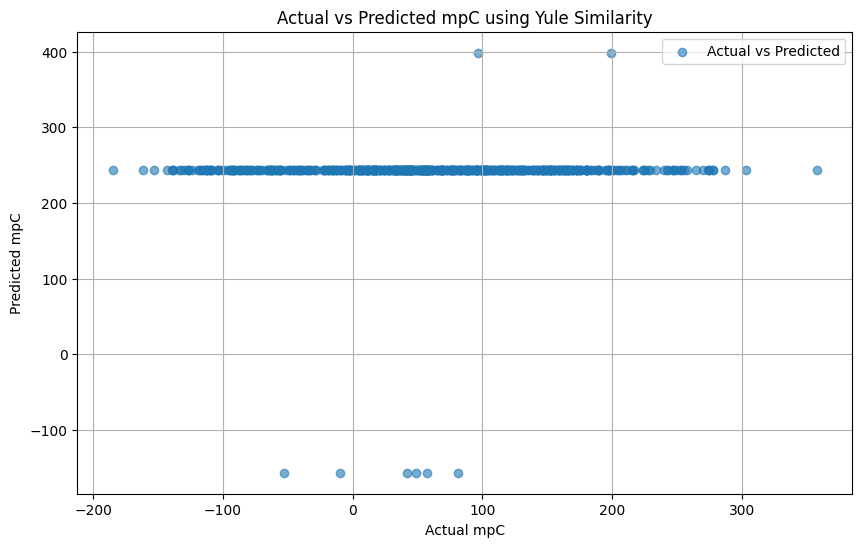

Evaluation Metrics for Cosine:
MAE: 113.92034057335414
MSE: 19212.239267690395
RMSE: 138.6082222225305


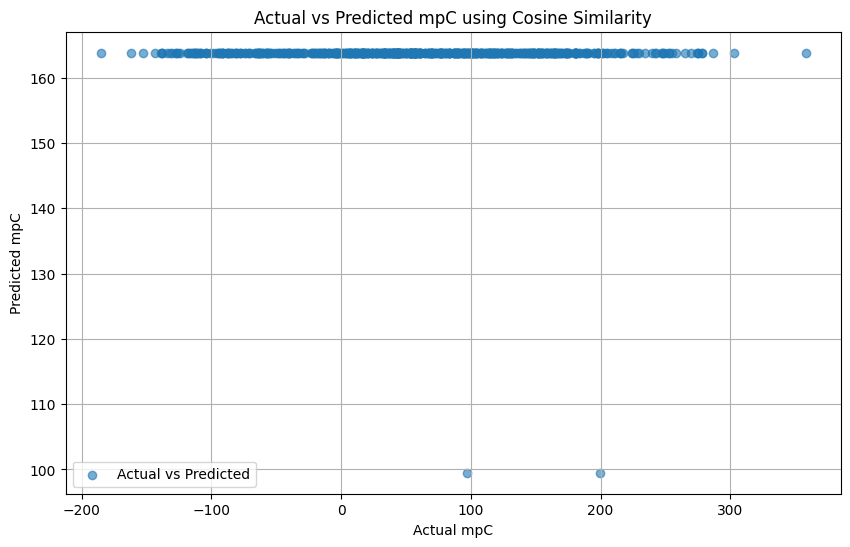

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluate_similarity_matrix(similarity_matrix, mpc_pred, matrix_name):
    Y_test_cleaned = Y_test.dropna()
    mpc_pred_cleaned = mpc_pred[~np.isnan(mpc_pred)]
    mae = mean_absolute_error(Y_test_cleaned, mpc_pred_cleaned)
    mse = mean_squared_error(Y_test_cleaned, mpc_pred_cleaned)
    rmse = np.sqrt(mse)
    print(f"Evaluation Metrics for {matrix_name}:")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_test_cleaned, mpc_pred_cleaned, alpha=0.6, label='Actual vs Predicted')
    plt.xlabel('Actual mpC')
    plt.ylabel('Predicted mpC')
    plt.title(f"Actual vs Predicted mpC using {matrix_name} Similarity")
    plt.legend()
    plt.grid(True)
    plt.show()
evaluate_similarity_matrix(yule_matrix_test,mpc_pred_kmean_yule1D, "Yule")
evaluate_similarity_matrix(cosine_matrix_test,mpc_pred_kmean_cosine1D , "Cosine")


In [48]:
#print(len([cluster_labels_dbscan_yule[i] for i in len(cluster_labels_dbscan_yule) if cluster_labels_dbscan_yule[i]>= 0]))
count=0
for i in cluster_labels_dbscan_yule:
  if i>0:
    count+=1
print(count)

113


In [50]:
from sklearn.manifold import TSNE
n_components_value = 2
perplexity_value = 30
tsne_yule = TSNE(n_components=n_components_value, perplexity=perplexity_value, random_state=42)
tsne_cosine = TSNE(n_components=n_components_value, perplexity=perplexity_value, random_state=42)
tsne_tanimoto = TSNE(n_components=n_components_value, perplexity=perplexity_value, random_state=42)
tsne_threed = TSNE(n_components=n_components_value, perplexity=perplexity_value, random_state=42)
tsne_yule.fit(yule_matrix)
tsne_cosine.fit(cosine_matrix)
tsne_tanimoto.fit(tanimoto_matrix)
tsne_threed.fit(threed_matrix)
X_train_tsne_yule = tsne_yule.embedding_
X_train_tsne_cosine = tsne_cosine.embedding_
X_train_tsne_tanimoto = tsne_tanimoto.embedding_
X_train_tsne_threed = tsne_threed.embedding_


In [51]:
print(X_train_tsne_yule)

[[ 14.3684435  45.376183 ]
 [ 15.302704  -35.98908  ]
 [ 24.670614  -33.234596 ]
 ...
 [-32.251926  -14.881197 ]
 [-14.73201   -44.249588 ]
 [-39.87617    37.58801  ]]


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
def smiles_to_morgan(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    try:
        Chem.Kekulize(mol)
    except:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    return list(fp)
X_train['FingerPrint'] = X_train['smiles'].apply(smiles_to_morgan)
X_train.dropna(inplace=True)
X_train_features = np.array(X_train['FingerPrint'].tolist())
print(np.isnan(X_train_features).any())



In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_features)


In [61]:
Y_train = Y_train[:X_tsne.shape[0]]


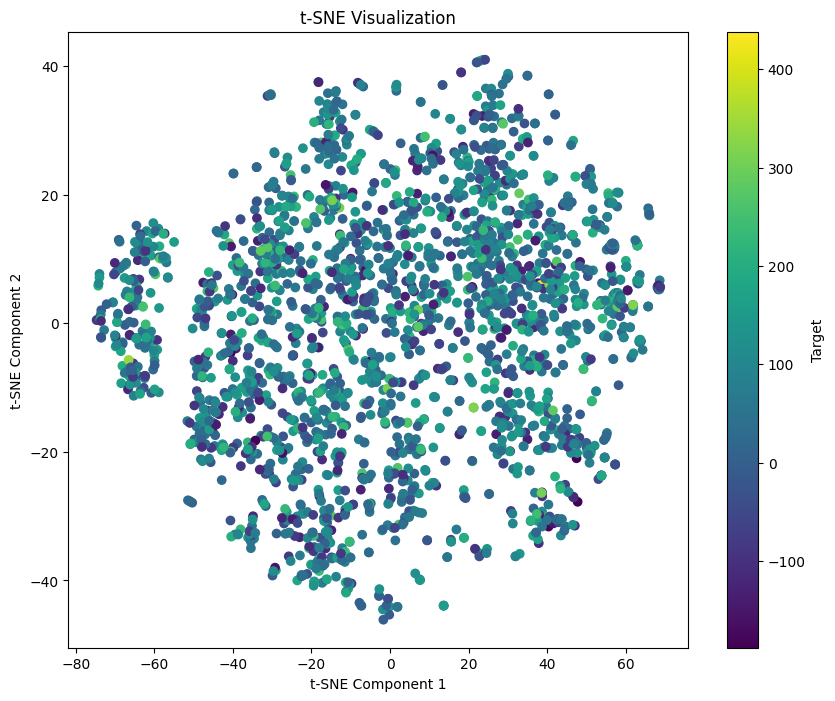

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_train, cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Target')
plt.show()
